# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [3]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [13]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
n_samples

17

In [15]:
# tf Graph Input
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [16]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [18]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [19]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.325101584 W= 0.5279978 b= -1.2013549
Epoch: 0100 cost= 0.296443403 W= 0.51144 b= -1.082238
Epoch: 0150 cost= 0.271094084 W= 0.49586678 b= -0.97020525
Epoch: 0200 cost= 0.248671368 W= 0.4812196 b= -0.86483455
Epoch: 0250 cost= 0.228837878 W= 0.4674436 b= -0.76573104
Epoch: 0300 cost= 0.211294696 W= 0.45448706 b= -0.6725225
Epoch: 0350 cost= 0.195777223 W= 0.44230103 b= -0.58485705
Epoch: 0400 cost= 0.182051808 W= 0.4308399 b= -0.5024064
Epoch: 0450 cost= 0.169911385 W= 0.42006037 b= -0.4248591
Epoch: 0500 cost= 0.159172997 W= 0.4099219 b= -0.35192382
Epoch: 0550 cost= 0.149674803 W= 0.40038636 b= -0.28332624
Epoch: 0600 cost= 0.141273603 W= 0.3914181 b= -0.21880881
Epoch: 0650 cost= 0.133842736 W= 0.38298312 b= -0.15812817
Epoch: 0700 cost= 0.127270177 W= 0.37504974 b= -0.10105628
Epoch: 0750 cost= 0.121456817 W= 0.36758828 b= -0.047378946
Epoch: 0800 cost= 0.116315067 W= 0.36057058 b= 0.0031059333
Epoch: 0850 cost= 0.111767292 W= 0.35397026 b= 0.05058829
Epoch: 0900

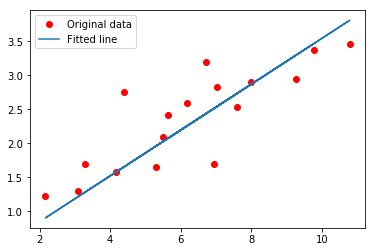

In [20]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [21]:
# Regression result